In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import os
os.chdir("E:/Masaüstü/bootcamp") 

In [3]:

ad=pd.read_csv("https://raw.githubusercontent.com/UVBMOB/Ankara2019/master/Verisetleri/hmelq.csv")
df=ad.copy()
df.dropna(inplace=True)
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 300.7+ KB


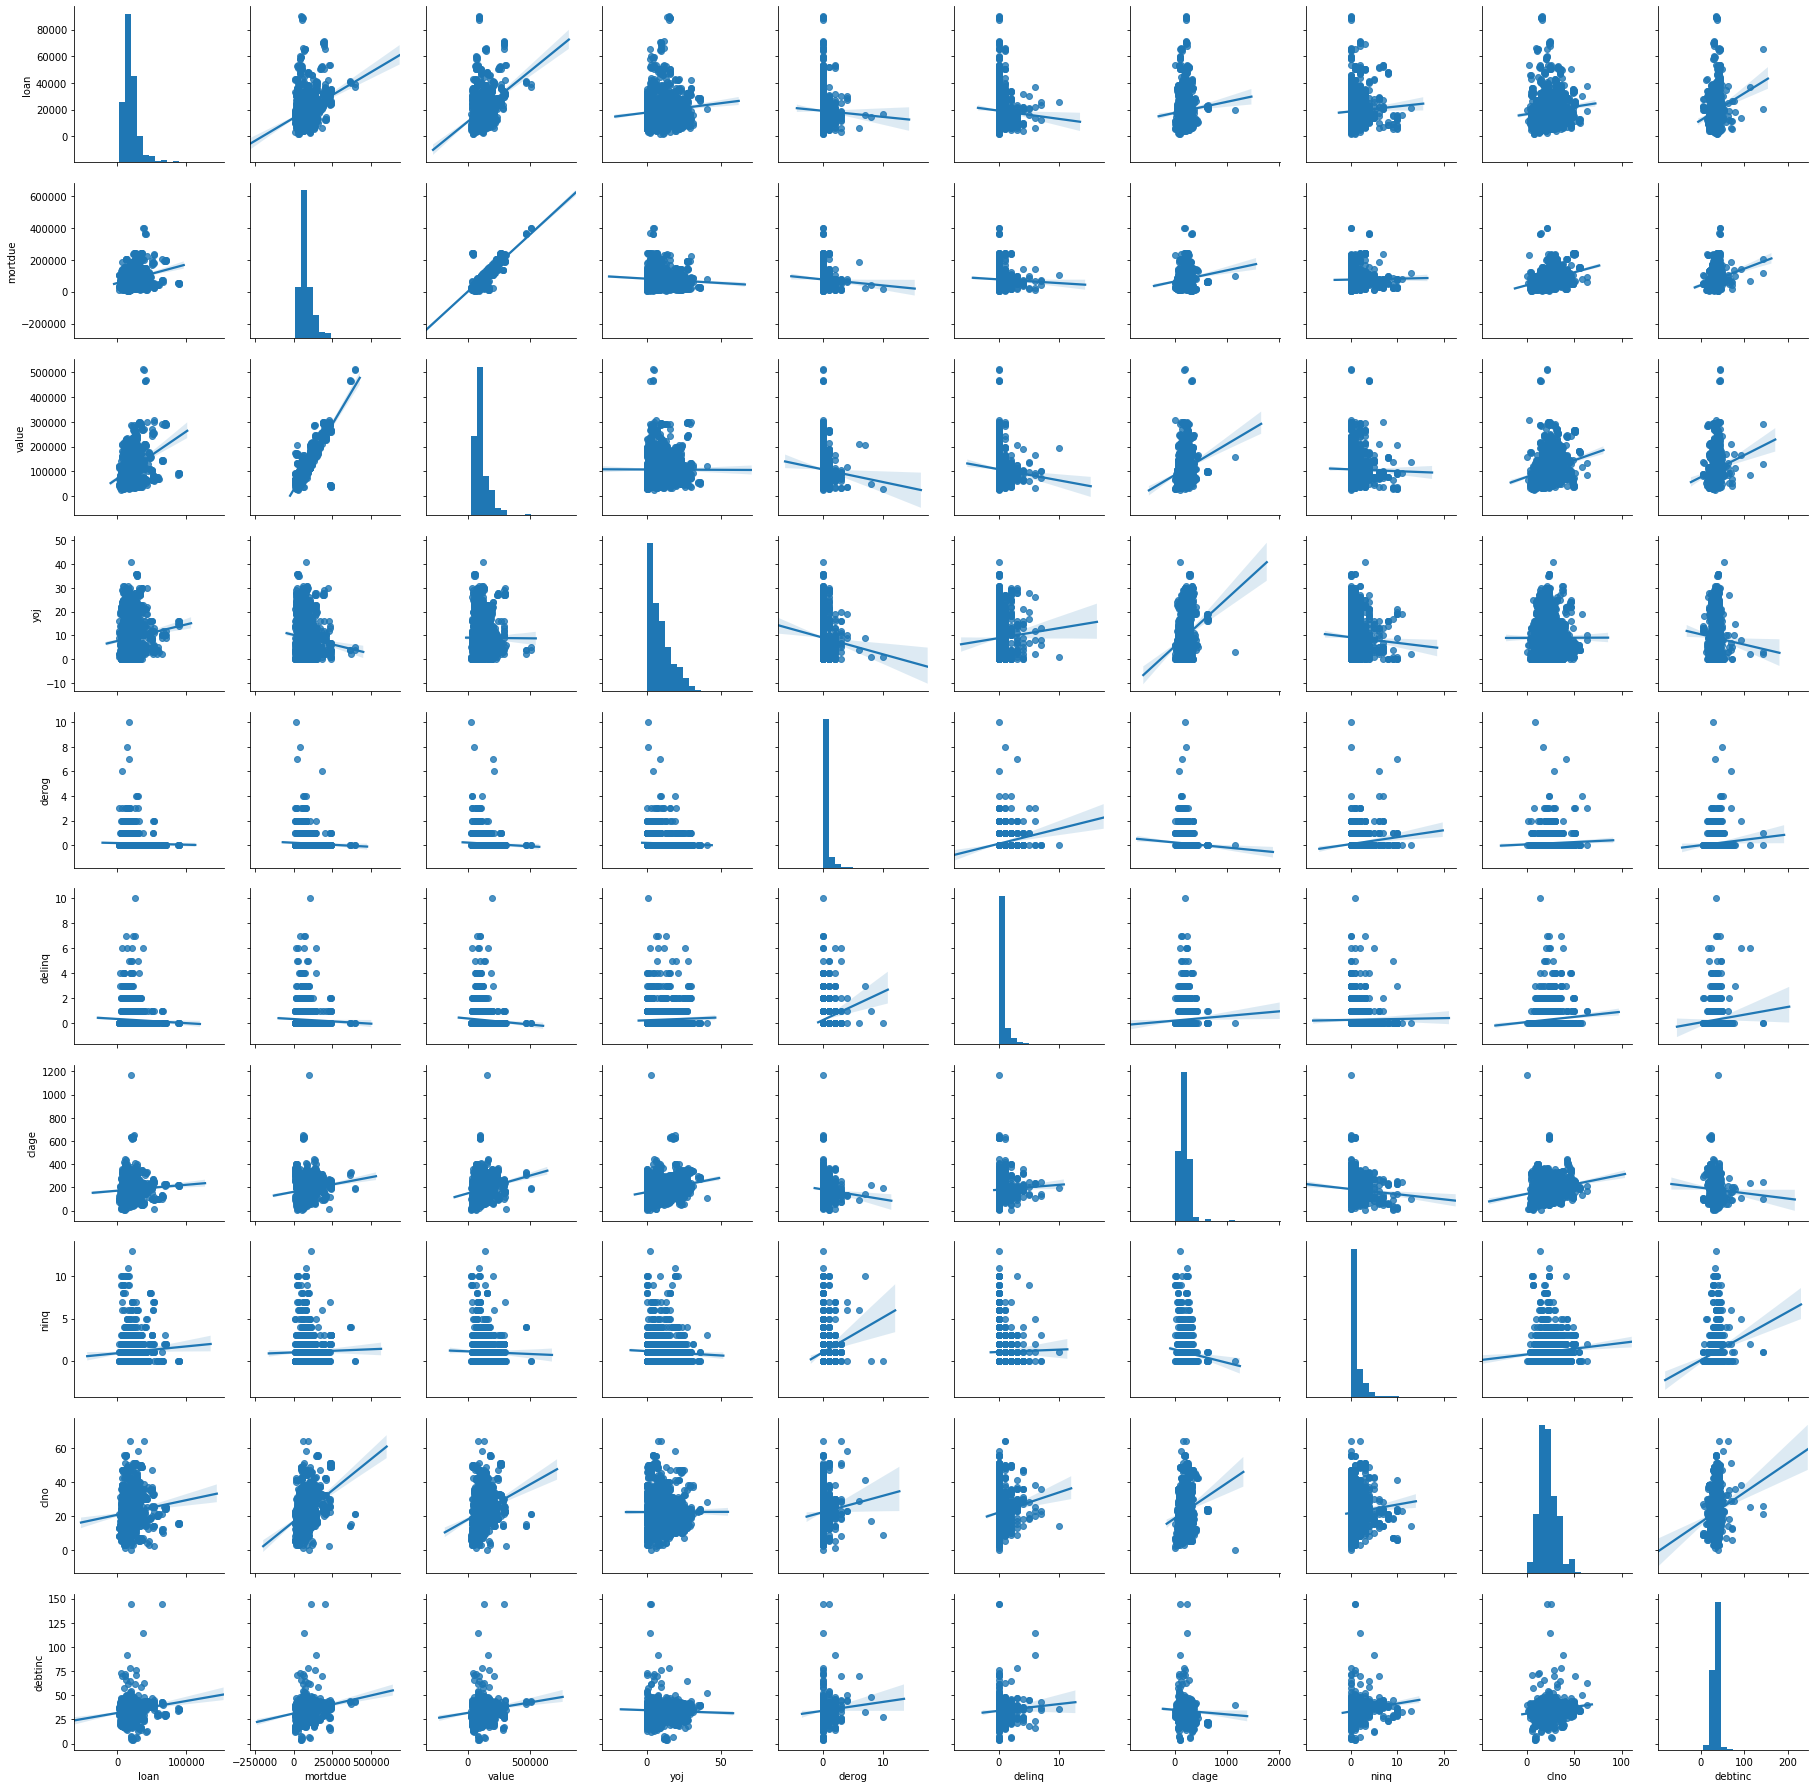

In [21]:
sns.pairplot(df.drop(["bad","reason","job"],axis=1),kind="reg")

In [22]:
y=df["bad"]
X=df.drop(["bad","reason","job"],axis=1)
print(y.shape)
print(X.shape)

(2018,)
(2018, 10)


In [23]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.1227
Time:                        17:05:39   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [28]:
#mortdue,value ve ninq değerlerini atıcam çünkü kötü müşteriyi anlamlandırmada önemli değiller

In [29]:
#şimdi asıl testim için datayı train ve split olarak ayıracağım ama bu sefer skitlearn ile de yapıcam

In [30]:
y=df["bad"]
X=df.drop(["bad","reason","job","mortdue","ninq","value"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.267639
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1607
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.1057
Time:                        17:11:26   Log-Likelihood:                -431.97
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 8.896e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.932e-05   1.07e-05     -2.745      0.006   -5.03e-05   -8.38e-06
yoj           -0.0390      0.014     -2.768      0.006      -0.067      -0.011
derog          0.5331      0.134      3.971      0.000       0.270       0.796
delinq         0.7646      0.095      8.036      0.000       0.578       0.951
clage         -0.0086      0.001     -6.151      0.000      -0.011      -0.006
clno          -0.0480      0.011     -4.287      0.000      -0.070      -0.026
debtinc        0.0157      0.007      2.172      0.030       0.002       0.030
==============================================================================
"""

In [32]:
#birde skitlearnle yapalım

In [33]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
loj_model.intercept_

array([-1.59290184])

In [35]:
loj_model.coef_

array([[-1.93014987e-05, -3.03903761e-02,  5.81730705e-01,
         9.11223868e-01, -7.08472115e-03, -3.95436013e-02,
         3.90304196e-02]])

In [36]:
#şimdi testlere geçelim ve modelin doğruluğuna bakalım

In [37]:
y_pred=loj_model.predict(X_test)
confusion_matrix(y_test,y_pred)
a=confusion_matrix(y_test,y_pred)
a

array([[366,   3],
       [ 30,   5]], dtype=int64)

In [38]:
#0 ların çoğunluğunu doğru bilirken 1 lerin çoğunluğunu yanlış biliyoruz

In [39]:
accuracy_score(y_test,y_pred)

0.9183168316831684

In [40]:
#accuracy çok yüksek çıktı ama yanlış bir şeyler var

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.62      0.14      0.23        35

    accuracy                           0.92       404
   macro avg       0.77      0.57      0.59       404
weighted avg       0.90      0.92      0.89       404



In [42]:
#modelin 1 leri tahmin etmede bariz bir sıkıntısı var

In [43]:
#son olarak ROC grafiği çizdiriyorum

In [46]:
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
logit_roc_auc

0.5673635307781648

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
print(fpr[0:10])
print(tpr[0:10])
print(thresholds[0:10])

[0.         0.         0.         0.00271003 0.00271003 0.01084011
 0.01084011 0.01355014 0.01355014 0.01897019]
[0.         0.02857143 0.05714286 0.05714286 0.14285714 0.14285714
 0.22857143 0.22857143 0.25714286 0.25714286]
[1.96169842 0.96169842 0.93185789 0.82896833 0.65069798 0.48606214
 0.43717781 0.38146559 0.36675448 0.36445297]


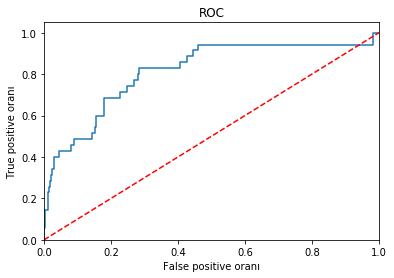

In [48]:
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive oranı")
plt.ylabel("True positive oranı")
plt.title("ROC")
plt.show()

In [ ]:
#modelin kötü olduğu anlaşılıyor